In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

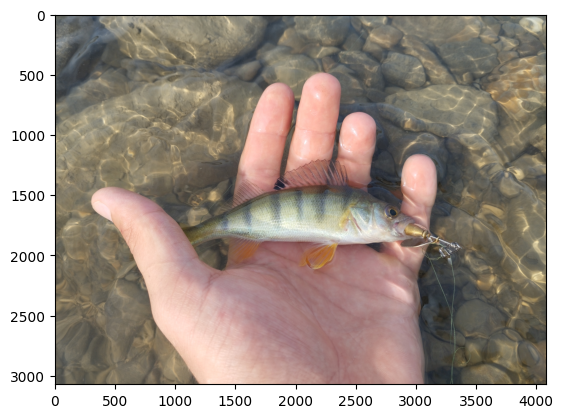

In [10]:
# Зчитуємо зображення
img = cv2.imread('lab1_Verenchuk_Stanislav/data/img1.jpg')
# Конвертуємо в RGB формат
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Відображуємо зображення
plt.imshow(img_rgb)
plt.show()

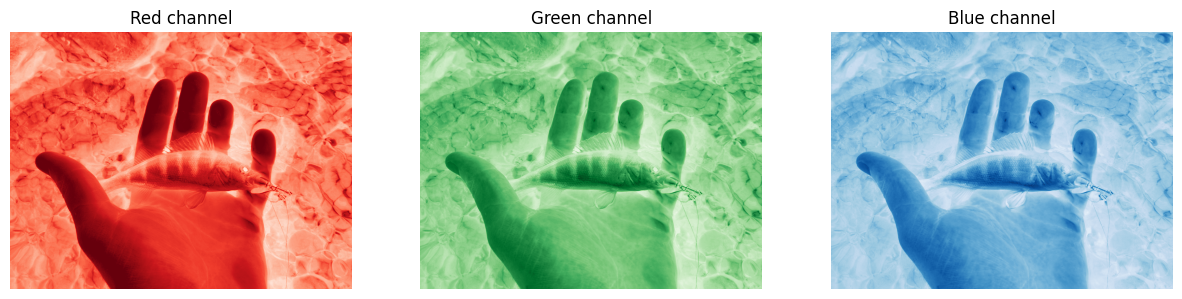

In [19]:
# Розбиваємо зображення на три канала: червоний, зелений та синій.
red, green, blue = cv2.split(img_rgb)

# Відобразимо канали
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# червоний
axes[0].imshow(red, cmap='Reds')
axes[0].set_title('Red channel')
axes[0].axis('off')

# зелений
axes[1].imshow(green, cmap='Greens')
axes[1].set_title('Green channel')
axes[1].axis('off')

# синій
axes[2].imshow(blue, cmap='Blues')
axes[2].set_title('Blue channel')
axes[2].axis('off')

plt.show()

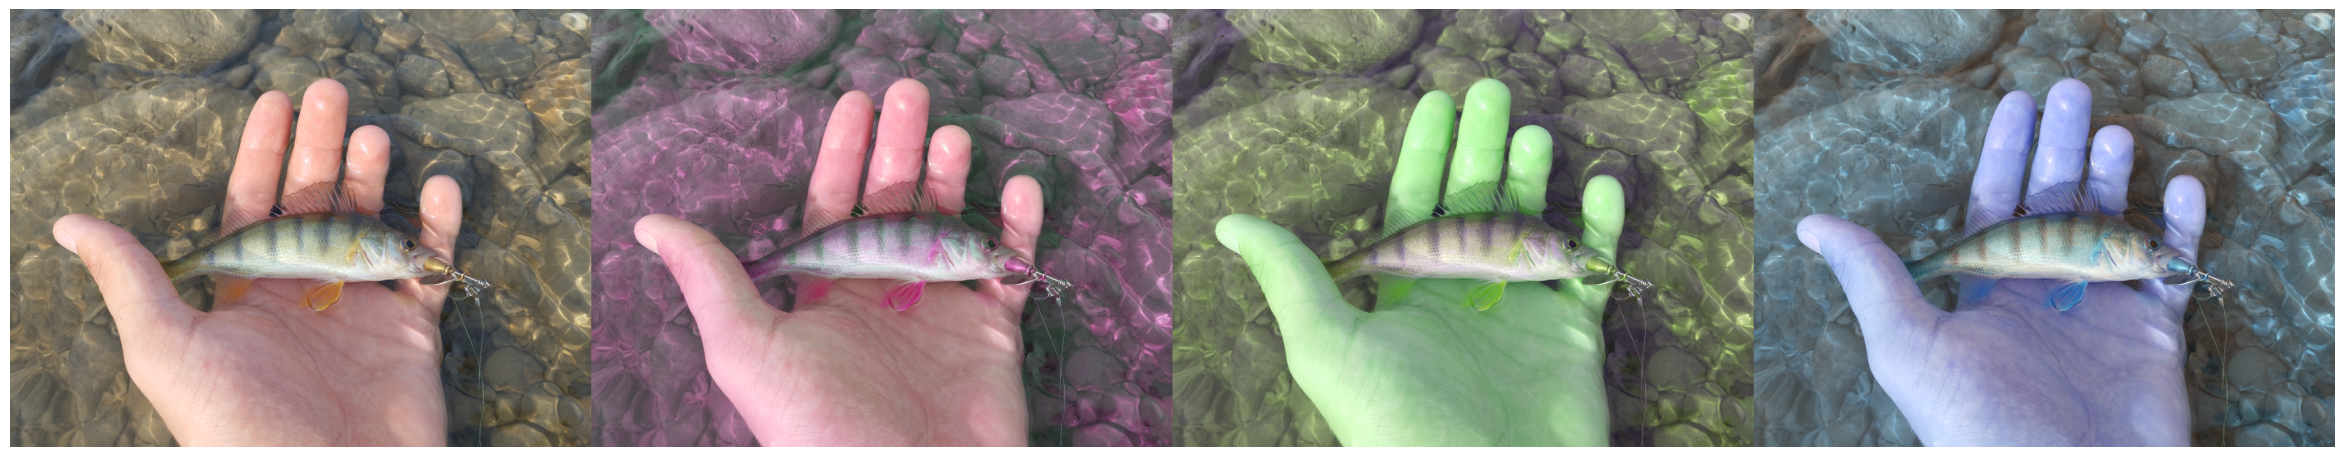

In [25]:
# Робимо злиття до одного зображення за допомогою функції .merge.
# RGB
img1 = cv2.merge([red, green, blue])
# RBG
img2 = cv2.merge([red, blue, green])
# GRB
img3 = cv2.merge([green, red, blue])
# BGR
img4 = cv2.merge([blue, green, red])

# Збираємо зображення в колаж
out1 = np.hstack([img1, img2])
out2 = np.hstack([img3, img4])
out = np.hstack([out1, out2])

plt.figure(figsize=(30, 40))
plt.imshow(out)
plt.axis('off')
plt.show()

# Висновки

### 1. Які різниці між зображеннями при різних порядках каналів?
При зміні порядку каналів кольори на зображенні спотворюються. 
На колажі показано вплив зміни порядку кольорів:
- Якщо поміняти місцями **зелений та синій**, об'єкт стане червоним ***(img2)***.
- Якщо поміняти місцями **червоний та зелений**, об'єкт стане зеленим ***(img3)***.
- Якщо поміняти місцями **червоний та синій**, об'єкт стане синім ***(img4)***.

### 2. Чому так відбувається?
Кожен піксель зображення зберігається у вигляді трьох чисел (значень каналів). Якщо змінити порядок цих чисел, змінюється сприйняття кольору:
- OpenCV використовує **BGR** за замовчуванням.
- Більшість бібліотек (наприклад, Matplotlib) очікують **RGB**.
- При некоректній обробці порядок каналів може змінюватися.

### 3. Які можуть бути проблеми в додатках комп’ютерного зору?
- **Помилки в обробці зображень** – алгоритми можуть інтерпретувати кольори неправильно.
- **Помилкове розпізнавання об'єктів** – якщо модель навчена на RGB, але отримує BGR, точність падає.
- **Спотворення візуалізації** – виведене зображення може виглядати неприродно.
- **Проблеми в сумісності бібліотек** – якщо одна бібліотека використовує RGB, а інша BGR, можливі конфлікти.
